# Lab 3 - Laser Modes

** EE/PHY 448/548**

** Scott Prahl**

** 5 Oct 2017, Version 1**

In [13]:
from __future__ import division, absolute_import, print_function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread 
from scipy.special import erf 

import laserbeamsize as lbs

pixel_size_mm = 3.75/1000           # pixel size in mm for the camera

## The fundamental mode TEM$_{00}$

The lowest order Hermite polynomials, $H_0(x)=1$ (and generalized Laguerre polynomials $L_0^0(x)=1$) are simply constants, so the fundamental ($m=0, n=0$) mode is a Gaussian.  The electric field $\mathcal{E}$ is
$$
\mathcal{E}_{00}(x,y,z) \propto e^{−(x^2+y^2)/w^2} e^{−ik(x^2+y^2)/2R(z)} e^{i(\omega t−kz+\phi)}
$$
The irradiance $E_{00}(x,y,z)$ at a given point in space is defined as the power per unit area in a plane perpendicular to the direction of propagation. It is proportional to the square of the electric field
$$
E_{00}(x,y,z)\propto \mathcal{E}_{00}\cdot \mathcal{E}_{00}^* = E_{00} e^{−2(x^2+y^2)/w^2}
$$
and the proportionality constant $E_{00}$ can be expressed in terms of the total power $P_{00}$ of the beam by requiring the integral of the irradiance over $x$ and $y$ to equal $P_{00}$
$$
E_{00} = {2P_0\over\pi w^2}
$$

## Razor Blade Test

<img src="http://omlc.org/~prahl/host/451/week3/razor.png" width="30%">

If the beam is partially blocked (e.g., with a razor blade that stops all light with $x>x'$), then the power reaching the detector is
$$
P(x')=I_0\int_{-\infty}^{x'} e^{−2x^2/w^2}dx\int_{-\infty}^\infty e^{−2y^2/w^2}dy
$$
and the normalized power reaching the detector is
$$
{P(x')\over P}={1\over2}\left[1+\mathrm{erf}\left(\sqrt{2}(x'-x_0)\over w\right)\right]
$$
where $\mathrm{erf}()$ denotes the error function.  The beam radius $w$ is found by fitting to the above expression. 

### Sample Data

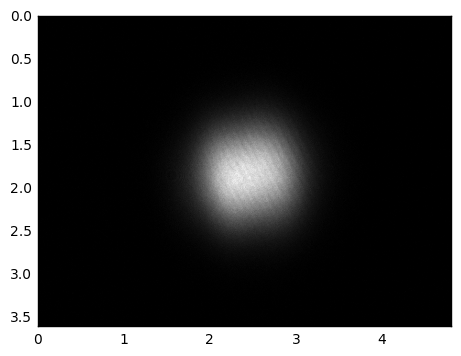

In [14]:
beam=imread('t-hene.pgm')

ym,xm = beam.shape
plt.imshow(beam,extent=[0,xm*pixel_size_mm,ym*pixel_size_mm,0],cmap='gray')
plt.show()

### Beam radius from cumulative sums

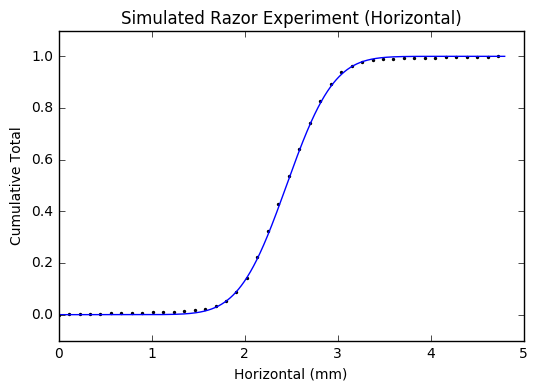

In [15]:
v,h = beam.shape
xval = pixel_size_mm * np.arange(0,h,1)
s = beam.sum(axis=0).cumsum()/beam.sum()
plt.scatter(xval[::30],s[::30], s=2)

w=0.8
x0=2.45

fit = 0.5*(1+erf((-x0+xval)*np.sqrt(2)/w))
plt.plot(xval,fit)
plt.xlabel("Horizontal (mm)")
plt.ylabel("Cumulative Total")
plt.title("Simulated Razor Experiment (Horizontal)")
plt.xlim(0,5)
plt.ylim(-0.1,1.1)
plt.show()

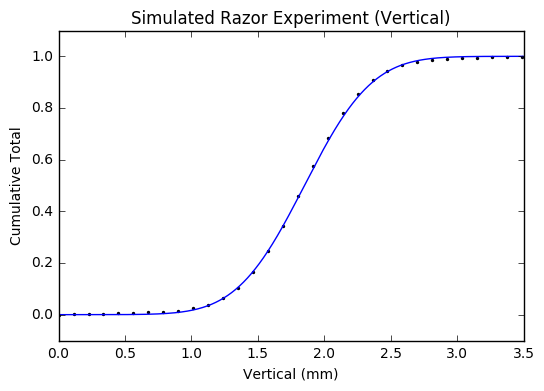

In [19]:
v,h = beam.shape
yval = pixel_size_mm * np.arange(0,v,1)
s = beam.sum(axis=1).cumsum()/beam.sum()
plt.scatter(yval[::30],s[::30], s=2)

w=0.8
x0=1.85

fit = 0.5*(1+erf((-x0+xval)*np.sqrt(2)/w))
plt.plot(xval,fit,'b')
plt.xlabel("Vertical (mm)")
plt.ylabel("Cumulative Total")
plt.title("Simulated Razor Experiment (Vertical)")
plt.xlim(0,3.5)
plt.ylim(-0.1,1.1)
plt.show()

### Beam Radius based on slope

Another method to based on the derivative of the cumulative power.  It turns out that the maximum value of the derivative $\alpha$ is related to the beam radius by
$$
\alpha =\sqrt{2\over\pi} {1\over w}
$$


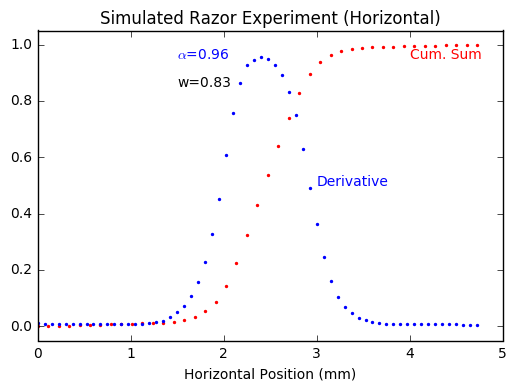

In [20]:
v,h = beam.shape
xval = pixel_size_mm * np.arange(0,h,1)
s = beam.sum(axis=0).cumsum()/beam.sum()

# this takes the derivative of the cumulative sum with respect to the real position
xderiv = np.gradient(s,xval)
alpha = xderiv.max()
w = 1/alpha*np.sqrt(2/np.pi)

plt.scatter(xval[::30],s[::30], s=2,color='red')
plt.scatter(xval[::20],xderiv[::20],s=2,color='blue')

plt.xlabel("Horizontal Position (mm)")
plt.ylabel("")
plt.title("Simulated Razor Experiment (Horizontal)")
plt.annotate("Derivative",xy=(3,0.5),color='blue')
plt.annotate("Cum. Sum",xy=(4,0.95),color='red')
plt.annotate(r"$\alpha$=%.2f"%alpha, xy=(1.5,0.95), color='blue')
plt.annotate("w=%.2f"%w, xy=(1.5,0.85), color='black')

plt.xlim(0,5)
plt.ylim(-0.05,1.05)
plt.show()


In [18]:
xc,yc,dx,dy,phi=lbs.beam_size(beam)

In [21]:
print(dx*pixel_size_mm)

1.48766403665
